First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


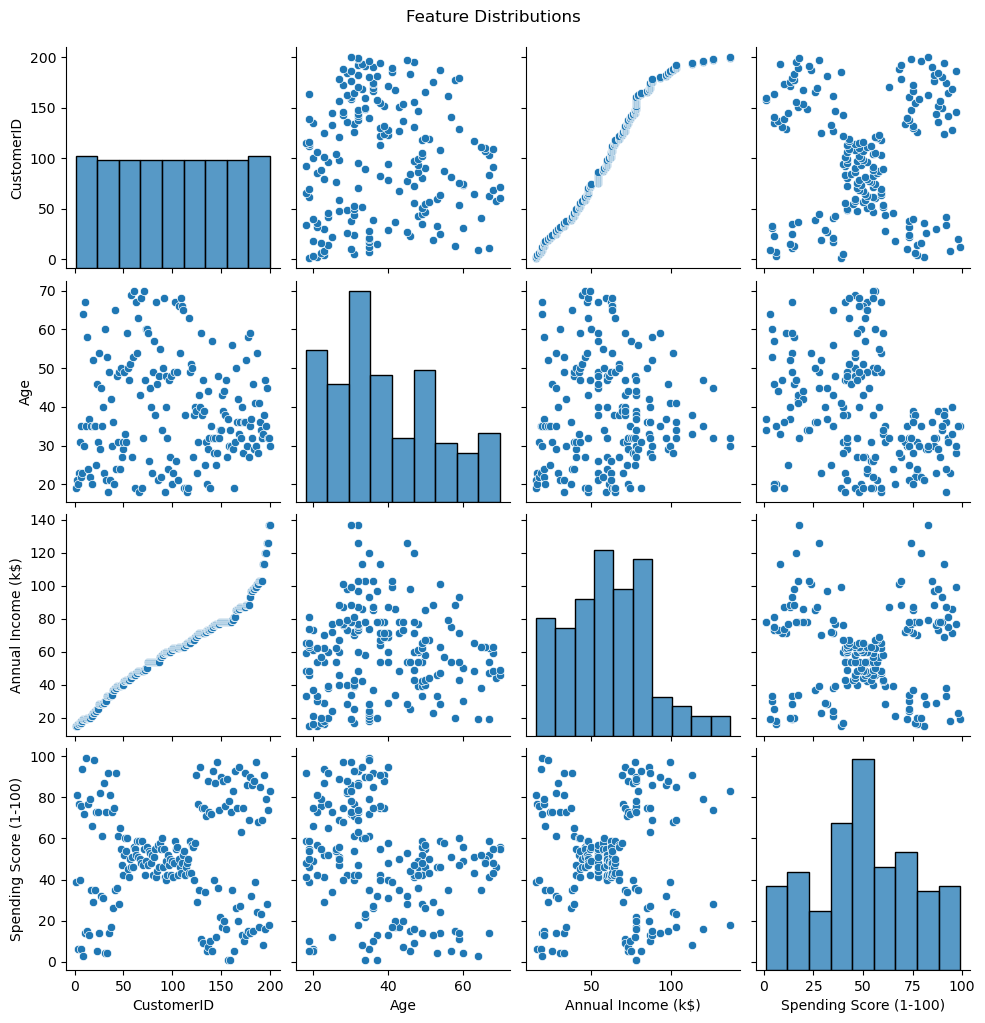

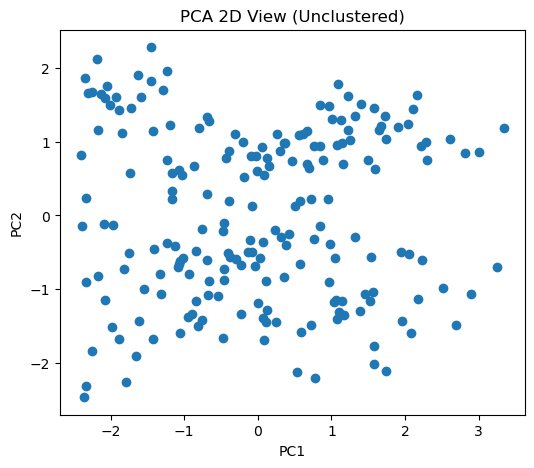

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

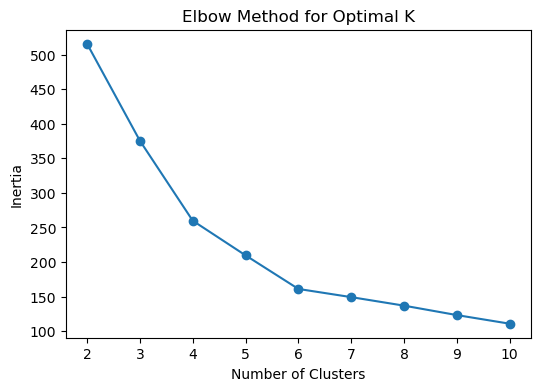

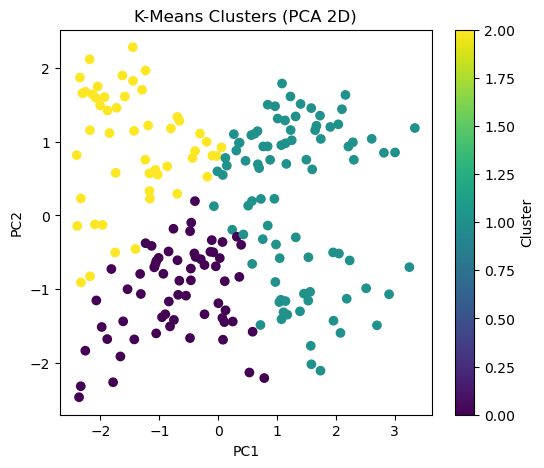

Silhouette Score for k=3: 0.337


In [5]:
# 1. Load and visualize dataset 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

print("First 5 rows:")
print(df.head())

# Basic visualization of distributions
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# Optional PCA to 2D for visualization
numeric_features = df.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

plt.figure(figsize=(6,5))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title("PCA 2D View (Unclustered)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 2. Fit K-Means and assign cluster labels
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# 3. Elbow Method to find optimal K
inertia_values = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia_values.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# 4. Visualize clusters with color-coding (PCA view)
plt.figure(figsize=(6,5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['Cluster'], cmap='viridis')
plt.title("K-Means Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()

# 5. Evaluate clustering using Silhouette Score
sil_score = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score for k=3: {sil_score:.3f}")
